## **Import Telcom Churn Dataset**

In [27]:
import pandas as pd
from IPython.display import display

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
display(df.head())

print(f'Number of null values in the dataset: {df.isnull().sum().sum()}')
print(f'Dimension/shape of the dataset: {df.shape}')
print(f'\nDatatypes of our columns: {df.dtypes}')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Number of null values in the dataset: 0
Dimension/shape of the dataset: (7043, 21)

Datatypes of our columns: customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


## **Basic Descriptive Statistics for Telco Churn Dataset**

In [28]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


The above summary of the dataset via df.describe() tells us that of the 21 variables - of which Churn represents our target variable - only 3 have some type of numeric structure. 

## **Target Variable Analysis**

In [29]:
display(df['Churn'].value_counts())
classNoChurn = df[df['Churn'] == 'No']
classYesChurn = df[df['Churn'] == 'Yes']

print(f'Number of samples of Churn target variable belonging to class 0 (No): {len(classNoChurn)}')
print(f'Number of samples of Churn target variable belonging to class 1 (Yes): {len(classYesChurn)}\n')
print(f'Percentage of class 0 (No) for Churn target variable {round((len(classNoChurn) / len(df)) * 100, 2)}%')
print(f'Percentage of class 1 (Yes) for Churn target variable {round((len(classYesChurn) / len(df)) * 100, 2)}%')



Churn
No     5174
Yes    1869
Name: count, dtype: int64

Number of samples of Churn target variable belonging to class 0 (No): 5174
Number of samples of Churn target variable belonging to class 1 (Yes): 1869

Percentage of class 0 (No) for Churn target variable 73.46%
Percentage of class 1 (Yes) for Churn target variable 26.54%


As can be seen from the above analysis, there is some class imbalance present as there are many more samples of the customers not churning (no class) compared to the customers churning (yes class). We will need to keep this in mind when constructing our machine learning models either by undersampling the majority class, oversampling the minority class, or weighting the classes. 

## **Additional Variable Analysis**

In [30]:
display(df['Contract'].value_counts())
display(df['InternetService'].value_counts())
display(df['MultipleLines'].value_counts())
display(df['PaymentMethod'].value_counts())

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

## **Data Cleaning**

In [31]:
from sklearn.preprocessing import LabelEncoder

columns = ["gender","SeniorCitizen","Partner","Dependents","tenure","PhoneService","MultipleLines",
   "InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV",
   "StreamingMovies","Contract","PaperlessBilling","PaymentMethod","MonthlyCharges","TotalCharges",
   "Churn"]

print(len(columns))

label_encoder = LabelEncoder()

# Drop Customer ID Column
df = df.drop(columns=["customerID"], axis=1)

for column in columns:
   df[column] = label_encoder.fit_transform(df[column])

df.head()

20


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925,1


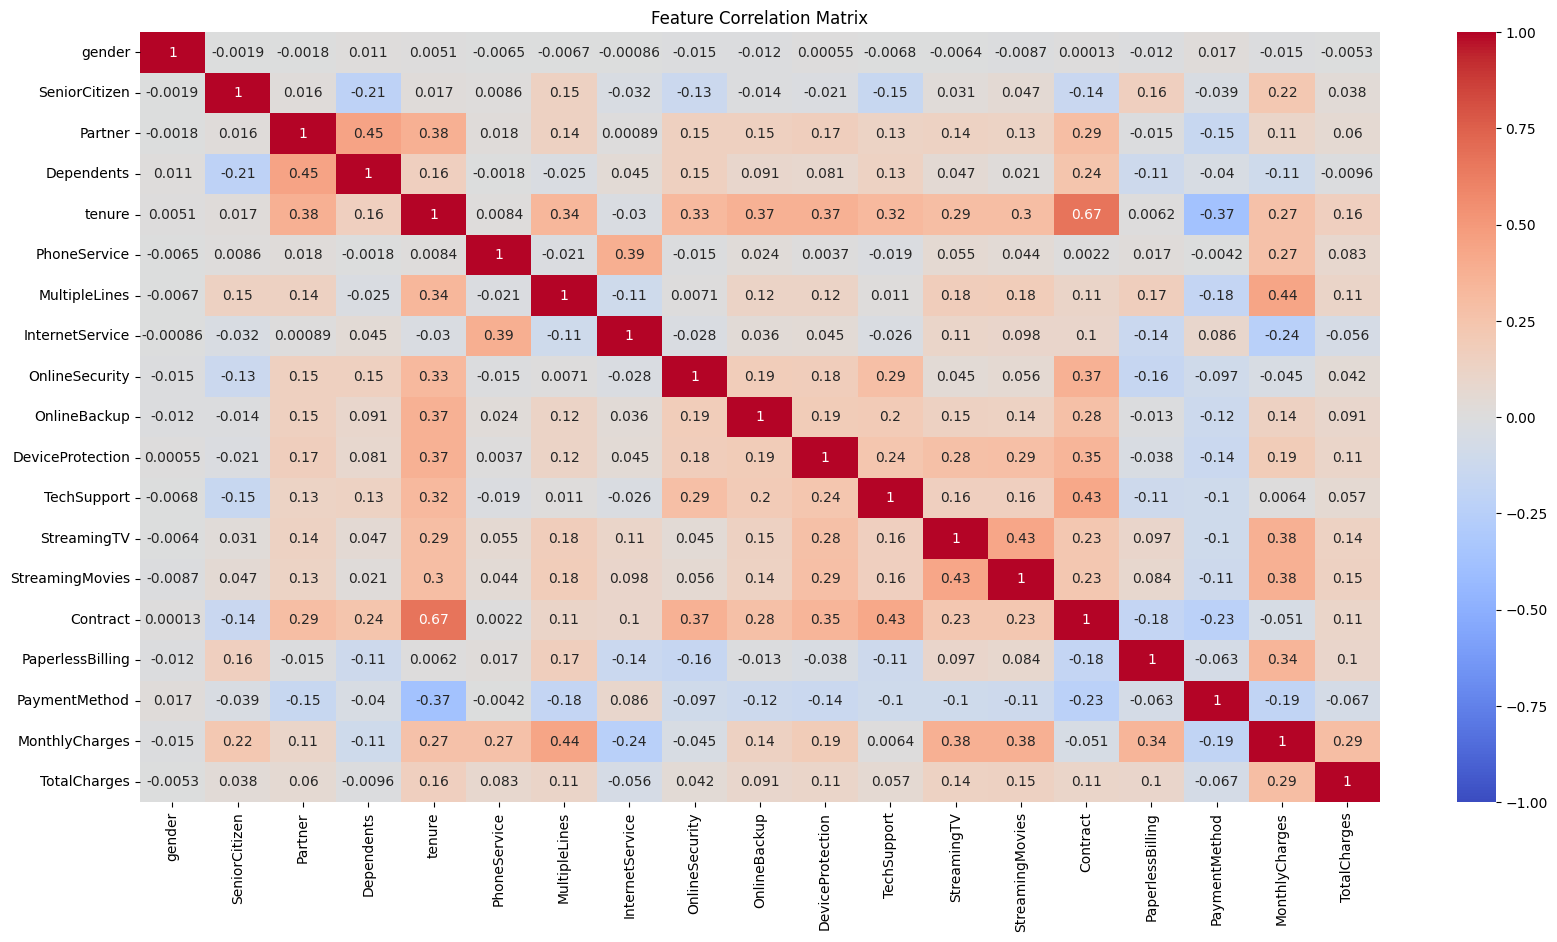

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.drop(columns=['Churn']).corr()

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.show()

# TODO: Get the barplot for the correlation ranges

Transform categorical features of the given dataset to numerical values for classification purposes

## **Feature Extraction**

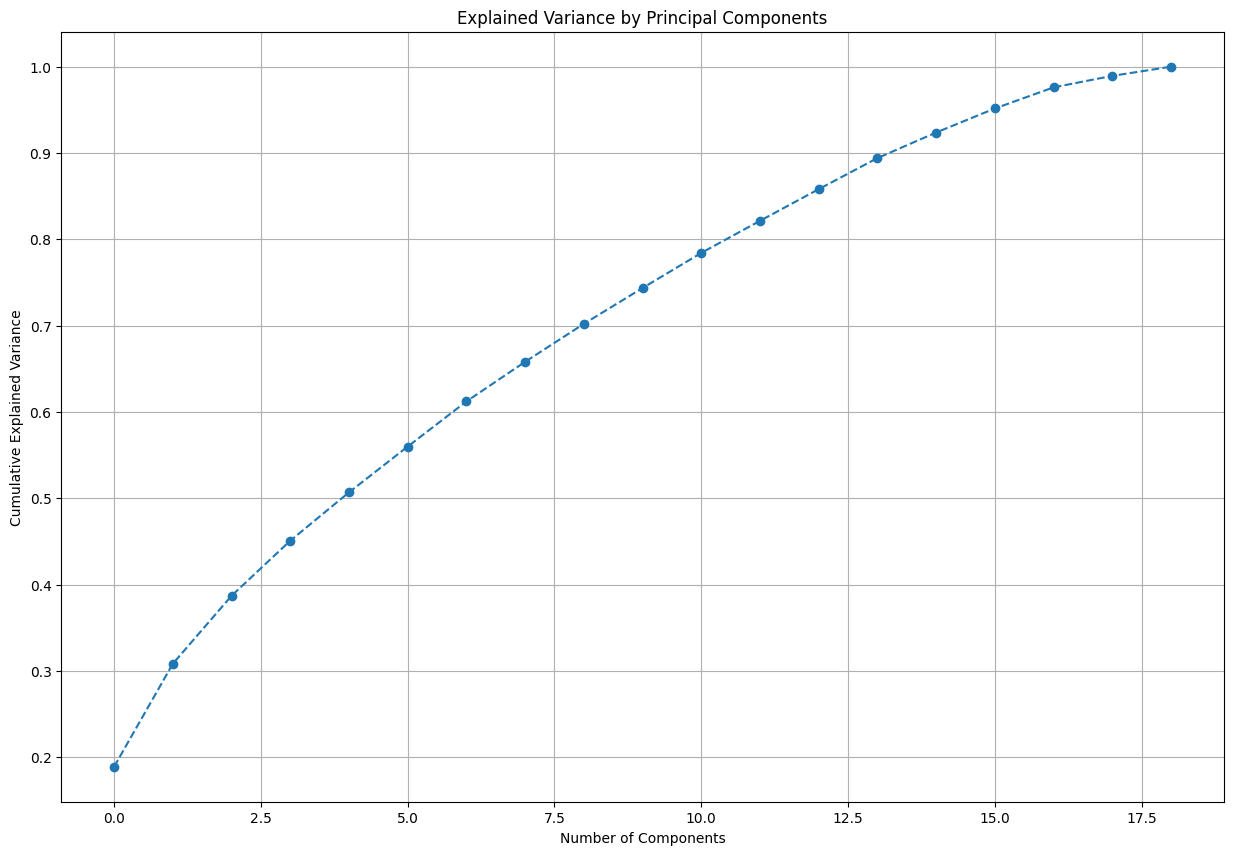

Number of components to retain 95% variance 16


array([[-2.24321637e+00, -1.86661740e-01, -2.98726486e+00, ...,
        -2.27881086e-01,  1.34765451e-01,  5.85763007e-02],
       [-1.34986640e+00, -1.52057795e+00, -5.11182908e-01, ...,
        -1.02319945e+00, -1.46423965e-01,  1.32104041e+00],
       [-2.58464549e+00, -6.05481535e-01, -7.95433902e-01, ...,
        -1.31148298e+00,  8.78604412e-02,  5.08494485e-01],
       ...,
       [-1.76351337e+00, -1.28619410e+00, -3.33694234e+00, ...,
        -1.69619160e+00, -5.28603556e-02, -9.29434585e-01],
       [-2.31337053e+00,  1.79654591e+00, -2.00140468e-01, ...,
         5.70777863e-01, -3.24094902e-03,  1.13481136e-01],
       [ 2.87882030e+00,  4.74596482e-01,  5.61730861e-01, ...,
        -6.77650504e-01, -1.14913138e-01,  2.46296797e-01]])

In [38]:
# Still in progress
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df.drop(columns=['Churn'], axis=1)
y = df['Churn']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Calculate cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(15, 10))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()


# Determine number of components
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance {n_components}")

# Apply PCA with chosen number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

X_pca